In [27]:
# Install Dependencies
! pip install pyspark
! pip install py4j
! pip install findspark

In [29]:
# Verify Spark works

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SmartSales").getOrCreate()
print(spark)

In [30]:
# Sales Table
from pyspark.sql import SparkSession

spark.conf.set("spark.sql.caseSensitive", "false")

# Start a Spark session
spark = SparkSession.builder \
    .appName("sales_data_preparedcsv") \
    .getOrCreate()

# Path to your CSV file
csv_path = "/Users/craigwilcox/Projects/smart-store-craigwilcox/Data/prepared/sales_data_prepared.csv"

# Load CSV into DataFrame
df_sales = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(csv_path)

# Show data
df_sales.show()


25/04/11 09:30:51 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
25/04/11 09:30:51 DEBUG SparkSession: Configurations that might not take effect:
  spark.app.name=sales_data_preparedcsv
25/04/11 09:30:51 DEBUG DataSource: Some paths were ignored:
  
25/04/11 09:30:51 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:30:51 INFO InMemoryFileIndex: It took 0 ms to list leaf files for 1 paths.
25/04/11 09:30:51 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#659
25/04/11 09:30:51 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#666
25/04/11 09:30:51 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:30:51 INFO FileSourceStrategy: Post-Scan Filters: (length(trim(value#659, None)) > 0)
25/04/11 09:30:51 DEBUG WholeStageCodegenExec: 
/* 001 */ public Object generate(Object[] references) {
/* 002 */   return new GeneratedIteratorForCodegenStage1(references);
/* 003 */ }
/* 004 */
/* 

+-------------+--------+----------+---------+-------+----------+----------+-----------------+--------+
|transactionid|saledate|customerid|productid|storeid|campaignid|saleamount|loyaltypercentage|billtype|
+-------------+--------+----------+---------+-------+----------+----------+-----------------+--------+
|          550|  1/6/24|      1008|      102|    404|         0|      39.1|                5|    Paid|
|          551|  1/6/24|      1009|      105|    403|         0|     19.78|                5|    Paid|
|          552| 1/16/24|      1004|      107|    404|         0|     335.1|                5|    Paid|
|          553| 1/16/24|      1006|      102|    406|         0|     195.5|                5| Invoice|
|          554| 1/25/24|      1005|      102|    405|         0|     117.3|                5| Invoice|
|          555| 1/25/24|      1001|      101|    401|         0|   2379.36|               20| Invoice|
|          556| 1/29/24|      1009|      104|    403|         0|     172.

25/04/11 09:30:51 DEBUG WholeStageCodegenExec: 
/* 001 */ public Object generate(Object[] references) {
/* 002 */   return new GeneratedIteratorForCodegenStage1(references);
/* 003 */ }
/* 004 */
/* 005 */ // codegenStageId=1
/* 006 */ final class GeneratedIteratorForCodegenStage1 extends org.apache.spark.sql.execution.BufferedRowIterator {
/* 007 */   private Object[] references;
/* 008 */   private scala.collection.Iterator[] inputs;
/* 009 */   private scala.collection.Iterator inputadapter_input_0;
/* 010 */   private org.apache.spark.sql.catalyst.expressions.codegen.UnsafeRowWriter[] project_mutableStateArray_0 = new org.apache.spark.sql.catalyst.expressions.codegen.UnsafeRowWriter[1];
/* 011 */
/* 012 */   public GeneratedIteratorForCodegenStage1(Object[] references) {
/* 013 */     this.references = references;
/* 014 */   }
/* 015 */
/* 016 */   public void init(int index, scala.collection.Iterator[] inputs) {
/* 017 */     partitionIndex = index;
/* 018 */     this.inputs = in

25/04/11 09:30:55 DEBUG ExecutorMetricsPoller: removing (18, 0) from stageTCMP
25/04/11 09:30:55 DEBUG ExecutorMetricsPoller: removing (19, 0) from stageTCMP
25/04/11 09:30:55 DEBUG ExecutorMetricsPoller: removing (20, 0) from stageTCMP


In [33]:
# Customers Tables

spark.conf.set("spark.sql.caseSensitive", "false")

# Path to your customer CSV file
customer_csv_path = "/Users/craigwilcox/Projects/smart-store-craigwilcox/Data/prepared/customers_data_prepared.csv"

# Load customer data into DataFrame
df_customer = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(customer_csv_path)

# Register the DataFrame as a temporary view
df_customer.createOrReplaceTempView("customer")


25/04/11 09:32:28 DEBUG DataSource: Some paths were ignored:
  
25/04/11 09:32:28 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:32:28 INFO InMemoryFileIndex: It took 1 ms to list leaf files for 1 paths.
25/04/11 09:32:28 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#771
25/04/11 09:32:28 DEBUG Analyzer$ResolveReferences: Resolving 'value to value#778
25/04/11 09:32:28 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:32:28 INFO FileSourceStrategy: Post-Scan Filters: (length(trim(value#771, None)) > 0)
25/04/11 09:32:28 DEBUG WholeStageCodegenExec: 
/* 001 */ public Object generate(Object[] references) {
/* 002 */   return new GeneratedIteratorForCodegenStage1(references);
/* 003 */ }
/* 004 */
/* 005 */ // codegenStageId=1
/* 006 */ final class GeneratedIteratorForCodegenStage1 extends org.apache.spark.sql.execution.BufferedRowIterator {
/* 007 */   private Object[] references;
/* 008 */   private scala.collection.Iterator[] inputs;


In [39]:
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("SmartSales").getOrCreate()

# Register DataFrames as temporary views (if not already done)
df_sales.createOrReplaceTempView("sales")
df_customer.createOrReplaceTempView("customer")

# Write query using Spark SQL
df_top_customers = spark.sql("""
    SELECT c.Name, SUM(s.saleamount) AS total_spent
    FROM sales s
    JOIN customer c ON s.customerid = c.CustomerID
    GROUP BY c.Name
    ORDER BY total_spent DESC
""")

# Show Spark results
df_top_customers.show()

# Convert to Pandas for use with charts
import pandas as pd
df_top_customers_pd = df_top_customers.toPandas()

25/04/11 09:37:21 DEBUG SparkSqlParser: Parsing command: sales
25/04/11 09:37:21 DEBUG SparkSqlParser: Parsing command: customer
25/04/11 09:37:21 DEBUG SparkSqlParser: Parsing command: 
    SELECT c.Name, SUM(s.saleamount) AS total_spent
    FROM sales s
    JOIN customer c ON s.customerid = c.CustomerID
    GROUP BY c.Name
    ORDER BY total_spent DESC

25/04/11 09:37:21 DEBUG Analyzer$ResolveReferences: Resolving 's.customerid to customerid#678
25/04/11 09:37:21 DEBUG Analyzer$ResolveReferences: Resolving 'c.CustomerID to CustomerID#788
25/04/11 09:37:21 DEBUG ResolveReferencesInAggregate: Resolving 'c.Name to Name#789
25/04/11 09:37:21 DEBUG ResolveReferencesInAggregate: Resolving 'c.Name to Name#789
25/04/11 09:37:21 DEBUG ResolveReferencesInAggregate: Resolving 's.saleamount to saleamount#682
25/04/11 09:37:21 DEBUG ResolveReferencesInSort: Resolving 'total_spent to total_spent#804
25/04/11 09:37:21 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID

+----------------+------------------+
|            Name|       total_spent|
+----------------+------------------+
|   William White|23752.520000000004|
|Hermione Granger|          22822.54|
|   Susan Johnson|           12422.6|
|       Chewbacca|11813.439999999999|
|   Tiffany James|          11715.82|
| Hermione Grager|           8750.94|
|    Wylie Coyote|           7434.44|
|          Dr Who|4064.8599999999997|
|       Dan Brown|2427.2999999999997|
|    Jason Bourne|           1806.34|
|      Tony Stark|           1545.54|
+----------------+------------------+



25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID#788))
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: leftKeys:List(customerid#678) | rightKeys:List(CustomerID#788)
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID#788))
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: leftKeys:List(customerid#678) | rightKeys:List(CustomerID#788)
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID#788))
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: leftKeys:List(customerid#678) | rightKeys:List(CustomerID#788)
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID#788))
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: leftKeys:List(customerid#678) | rightKeys:List(CustomerID#788)
25/04/11 09:37:23 DEBUG ExtractEquiJoinKeys: Considering join on: Some((customerid#678 = CustomerID#788))
25/04/11 09:37:23 DEBUG ExtractEquiJoi

25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (34, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (26, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (25, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (28, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (30, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (29, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (37, 0) from stageTCMP
25/04/11 09:37:25 DEBUG ExecutorMetricsPoller: removing (32, 0) from stageTCMP


In [45]:
from pyspark.sql.functions import col, to_date, year, quarter, month

# Step 1: Ensure the `saledate` is in date format if it's a string
df_sales = df_sales.withColumn("saledate", to_date(col("saledate"), "yyyy-MM-dd"))

# Step 2: Filter the data (Make sure `saledate` is in date format for comparison)
df_filtered = df_sales.filter(df_sales.saledate >= "2023-01-01")

# Step 3: Group by `billtype` and `storeid`, sum `amount`
df_sales.groupby("billtype", "storeid").sum("saleamount").show()

# Step 4: Extract `year`, `quarter`, and `month` from `saledate`
df_sales = df_sales.withColumn("year", year(df_sales.saledate))
df_sales = df_sales.withColumn("quarter", quarter(df_sales.saledate))
df_sales = df_sales.withColumn("month", month(df_sales.saledate))

# Step 5: Group by `year`, `quarter`, and `month`, sum `saleamount`
df_sales.groupby("year", "quarter", "month").sum("saleamount").show()

25/04/11 09:43:45 DEBUG Analyzer$ResolveReferences: Resolving 'saledate to saledate#878
25/04/11 09:43:45 DEBUG ResolveReferencesInAggregate: Resolving 'billtype to billtype#684
25/04/11 09:43:45 DEBUG ResolveReferencesInAggregate: Resolving 'storeid to storeid#680
25/04/11 09:43:45 DEBUG ResolveReferencesInAggregate: Resolving 'billtype to billtype#684
25/04/11 09:43:45 DEBUG ResolveReferencesInAggregate: Resolving 'storeid to storeid#680
25/04/11 09:43:45 INFO FileSourceStrategy: Pushed Filters: 
25/04/11 09:43:45 INFO FileSourceStrategy: Post-Scan Filters: 
25/04/11 09:43:45 DEBUG InsertAdaptiveSparkPlan: Adaptive execution enabled for plan: CollectLimit 21
+- HashAggregate(keys=[billtype#684, storeid#680], functions=[sum(saleamount#682)], output=[toprettystring(billtype)#926, toprettystring(storeid)#927, toprettystring(sum(saleamount))#928])
   +- HashAggregate(keys=[billtype#684, storeid#680], functions=[partial_sum(saleamount#682)], output=[billtype#684, storeid#680, sum#933])
  

+--------+-------+------------------+
|billtype|storeid|   sum(saleamount)|
+--------+-------+------------------+
| Invoice|    406|            391.82|
| Invoice|    402| 4940.400000000001|
| Invoice|    404|             431.0|
|  Credit|    406|3375.6800000000003|
|  Credit|    401|            7889.6|
|  Credit|    402|          23673.66|
| Invoice|    403|            593.98|
|  Credit|    405|1367.6399999999999|
|  Credit|    404|          12474.66|
| Invoice|    405|           6640.54|
|    Paid|    403|           2846.54|
|    Paid|    402|1642.9199999999998|
|  Credit|    403|            793.12|
|    Paid|    404|453.32000000000005|
| Invoice|    401|16515.920000000002|
|    Paid|    406|           7948.32|
|    Paid|    401|           8097.94|
|    Paid|    405| 8479.279999999999|
+--------+-------+------------------+



25/04/11 09:43:45 INFO CodeGenerator: Code generated in 27.920926 ms
25/04/11 09:43:45 INFO MemoryStore: Block broadcast_60 stored as values in memory (estimated size 351.8 KiB, free 363.6 MiB)
25/04/11 09:43:45 DEBUG BlockManager: Put block broadcast_60 locally took 1 ms
25/04/11 09:43:45 DEBUG BlockManager: Putting block broadcast_60 without replication took 1 ms
25/04/11 09:43:45 INFO MemoryStore: Block broadcast_60_piece0 stored as bytes in memory (estimated size 34.7 KiB, free 363.6 MiB)
25/04/11 09:43:45 DEBUG BlockManagerMasterEndpoint: Updating block info on master broadcast_60_piece0 for BlockManagerId(driver, macbookpro.lan, 57375, None)
25/04/11 09:43:45 INFO BlockManagerInfo: Added broadcast_60_piece0 in memory on macbookpro.lan:57375 (size: 34.7 KiB, free: 366.1 MiB)
25/04/11 09:43:45 DEBUG BlockManagerMaster: Updated info of block broadcast_60_piece0
25/04/11 09:43:45 DEBUG BlockManager: Told master about block broadcast_60_piece0
25/04/11 09:43:45 DEBUG BlockManager: Put

+----+-------+-----+------------------+
|year|quarter|month|   sum(saleamount)|
+----+-------+-----+------------------+
|NULL|   NULL| NULL|108556.34000000004|
+----+-------+-----+------------------+



25/04/11 09:43:46 INFO CodeGenerator: Code generated in 16.109219 ms
25/04/11 09:43:46 DEBUG GenerateUnsafeProjection: code for null:
/* 001 */ public java.lang.Object generate(Object[] references) {
/* 002 */   return new SpecificUnsafeProjection(references);
/* 003 */ }
/* 004 */
/* 005 */ class SpecificUnsafeProjection extends org.apache.spark.sql.catalyst.expressions.UnsafeProjection {
/* 006 */
/* 007 */   private Object[] references;
/* 008 */   private org.apache.spark.sql.catalyst.expressions.codegen.UnsafeRowWriter[] mutableStateArray_0 = new org.apache.spark.sql.catalyst.expressions.codegen.UnsafeRowWriter[1];
/* 009 */
/* 010 */   public SpecificUnsafeProjection(Object[] references) {
/* 011 */     this.references = references;
/* 012 */     mutableStateArray_0[0] = new org.apache.spark.sql.catalyst.expressions.codegen.UnsafeRowWriter(1, 0);
/* 013 */
/* 014 */   }
/* 015 */
/* 016 */   public void initialize(int partitionIndex) {
/* 017 */
/* 018 */   }
/* 019 */
/* 020 */ 

25/04/11 09:43:55 DEBUG ExecutorMetricsPoller: removing (38, 0) from stageTCMP
25/04/11 09:43:55 DEBUG ExecutorMetricsPoller: removing (41, 0) from stageTCMP
25/04/11 09:43:55 DEBUG ExecutorMetricsPoller: removing (40, 0) from stageTCMP
25/04/11 09:43:55 DEBUG ExecutorMetricsPoller: removing (43, 0) from stageTCMP


In [47]:
print(df_top_customers_pd.columns)

Index(['Name', 'total_spent'], dtype='object')


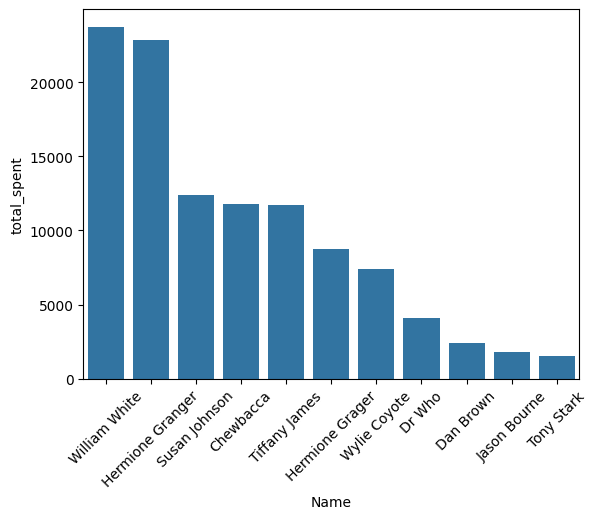

In [48]:
# All imports at the top, organized
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_top_customers_pd, x="Name", y="total_spent")
plt.xticks(rotation=45)
plt.show()